In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import rosbag_to_csv

In [2]:
dir_name = "/home/kogure/pilot-auto.xx1/src/autoware_tools/control_data_collecting_tool/scripts/calibration/calibration_ver2/brake/acceleration_accuracy_brake_0.5_20241225-100042"
dir_name = "/home/kogure/pilot-auto.xx1/src/autoware_tools/control_data_collecting_tool/scripts/calibration/checker/brake/acceleration_accuracy_brake_-0.2_20241226-043434"
rosbag_to_csv.rosbag_to_csv(dir_name)


There are  469 messages in  /control/command/actuation_cmd

There are  454 messages in  /control/command/control_cmd

There are  196 messages in  /control/command/gear_cmd

There are  105 messages in  /api/external/get/vehicle/status

There are  105 messages in  /vehicle/doors/status

There are  103 messages in  /awapi/vehicle/get/status

There are  0 messages in  /control/trajectory_follower/lane_departure_checker_node/debug/processing_time_ms_diag

There are  0 messages in  /vehicle/raw_vehicle_cmd_converter/debug/steer_pid

There are  0 messages in  /control/control_validator/debug/marker

There are  0 messages in  /control/control_validator/validation_status

There are  0 messages in  /control/control_validator/output/markers

There are  0 messages in  /control/control_validator/virtual_wall

There are  0 messages in  /control/trajectory_follower/lane_departure_checker_node/debug/processing_time_ms

There are  793 messages in  /vehicle/status/velocity_status

There are  793 messag

In [8]:
velocity_csv = "vehicle_status_velocity_status.csv"
actuation_cmd_csv = "control_command_actuation_cmd.csv"
control_cmd_csv = "control_command_control_cmd.csv"

In [4]:
velocity_df = pd.read_csv(dir_name + "/" + velocity_csv).to_numpy()
vel_stamp = velocity_df[:,0] +  1e-9 * velocity_df[:,1]
velocity = velocity_df[:,3]

actuation_cmd_df = pd.read_csv(dir_name + "/" + actuation_cmd_csv).to_numpy()
actuation_cmd_stamp = actuation_cmd_df[:,0] +  1e-9 * actuation_cmd_df[:,1]
accel = actuation_cmd_df[:,3]
brake = actuation_cmd_df[:,4]

control_cmd_df = pd.read_csv(dir_name + "/" + control_cmd_csv).to_numpy()
control_cmd_stamp = control_cmd_df[:,0] +  1e-9 * control_cmd_df[:,1]
control_cmd = control_cmd_df[:,16]

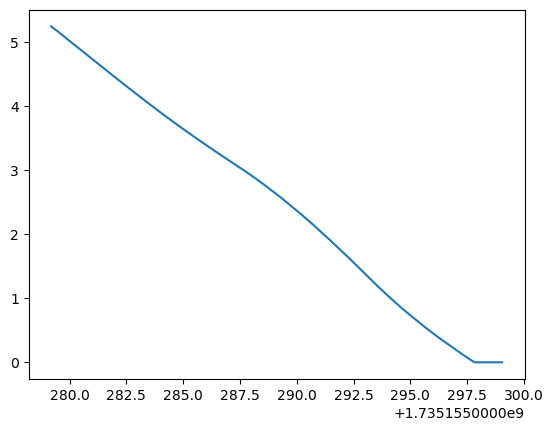

In [14]:
#velocity
plt.plot(vel_stamp, velocity)

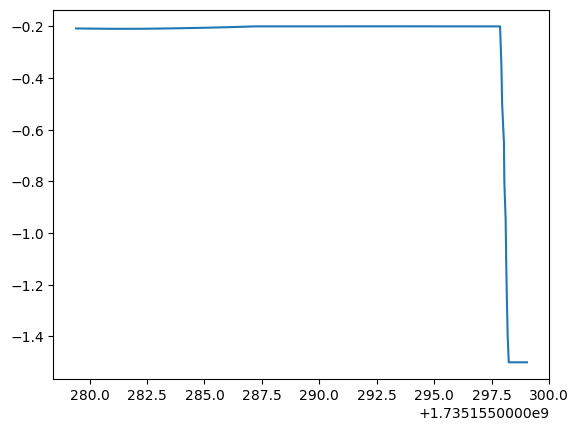

In [15]:
#control_cmd
plt.plot(control_cmd_stamp, control_cmd)

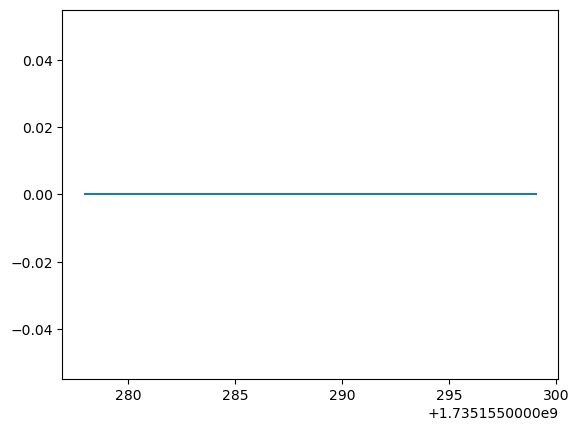

In [16]:
#accel
plt.plot(actuation_cmd_stamp, accel)

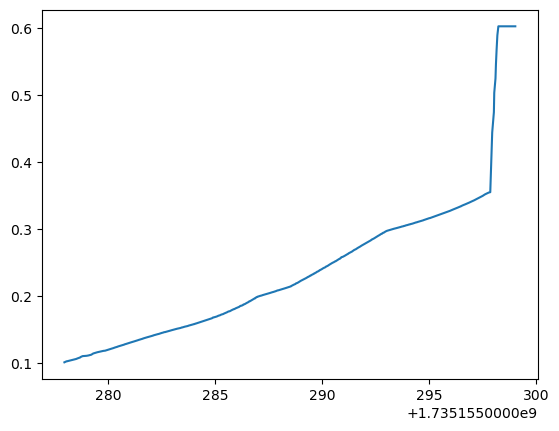

In [17]:
#brake
plt.plot(actuation_cmd_stamp, brake)